# 2018 Kaggle Machine Learning & Data Science Survey Analysis

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import seaborn as sns
import plotly.offline as py
pd.set_option('display.max_columns', None)
%matplotlib inline
py.init_notebook_mode(connected=True)

We will focus on multiple choice responses. Sometimes responses from free form questions will be used to have more sense about a question.

In [2]:
# read data

mcr_df = pd.read_csv('multipleChoiceResponses.csv', low_memory=False, header=[0,1]) #multiple-choice responses
ffr_df = pd.read_csv('freeFormResponses.csv', low_memory=False, header=[0,1]) # free form responses

# adjust columns
mcr_df.columns = mcr_df.columns.map('_'.join)
ffr_df.columns = ffr_df.columns.map('_'.join)

In [3]:
# dimention of the data
mcr_df.shape, ffr_df.shape

((23859, 395), (23859, 35))

In [4]:
# what data types are we dealing with
mcr_df.dtypes.value_counts()

object     345
int64       36
float64     14
dtype: int64

In [5]:
ffr_df.dtypes.value_counts()

object     34
float64     1
dtype: int64

Not all columns correspond to one question – there are some questions where it was required to select all answers that apply. Therefore, such questions are split into several columns. Some columns contain numerical data, which are not required for analysis. In total of 50 questions were asked and we have selected some part of them for our research.

According to Kaggle, free form responses are shuffled column-wise to protect user privacy – in other words responses that appear on the same row does not necessarily come from the same survey-taker. Kaggle does not provide a key to match the multiple choice and free form responses. Therefore, free form responses are mainly used as a source to get additional insights about a question asked. 

We are going to focus on the following questions:

In [6]:
# rename columns that we are primarily interested.
mcr_df = mcr_df.rename({'Time from Start to Finish (seconds)_Duration (in seconds)' : 'duration', 
                 'Q1_What is your gender? - Selected Choice' : 'gender', 
                 'Q2_What is your age (# years)?' : 'age', 
                 'Q3_In which country do you currently reside?' : 'country', 
                 'Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?' : 'education', 
                 'Q5_Which best describes your undergraduate major? - Selected Choice' : 'major', 
                 'Q6_Select the title most similar to your current role (or most recent title if retired): - Selected Choice' : 'title', 
                 'Q7_In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice' : 'industry', 
                'Q8_How many years of experience do you have in your current role?' : 'experience', 
                'Q9_What is your current yearly compensation (approximate $USD)?' : 'compensation', 
                'Q10_Does your current employer incorporate machine learning methods into their business?' : 'employerML?', 
                'Q12_MULTIPLE_CHOICE_What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice' : 'primary_tool', 
                'Q17_What specific programming language do you use most often? - Selected Choice' : 'language_often', 
                'Q18_What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice' : 'language_recommend', 
                'Q20_Of the choices that you selected in the previous question, which ML library have you used the most? - Selected Choice' : 'MLlibrary_most',
                'Q22_Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most? - Selected Choice' :'dataviz_most',       
                'Q23_Approximately what percent of your time at work or school is spent actively coding?' : 'time_coding',
                'Q24_How long have you been writing code to analyze data?': 'coding_experience',
                'Q25_For how many years have you used machine learning methods (at work or in school)?': 'years_ML_used',
                'Q26_Do you consider yourself to be a data scientist?': 'consider_DS',
                'Q32_What is the type of data that you currently interact with most often at work or school? - Selected Choice': 'datatype_most',
                'Q37_On which online platform have you spent the most amount of time? - Selected Choice': 'learning_platform_most',
                'Q40_Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:': 'academicsVSprojects',
                'Q48_Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?': 'ML_blackbox'}, axis='columns')


In [7]:
# rename columns that we are interested from free form response data.
ffr_df = ffr_df.rename({'Q6_OTHER_TEXT_Select the title most similar to your current role (or most recent title if retired): - Other - Text' : 'current_title',
                                  'Q7_OTHER_TEXT_In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text':'industry',
                                   "Q13_OTHER_TEXT_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Other - Text":'ide',
                                  'Q18_OTHER_TEXT_What programming language would you recommend an aspiring data scientist to learn first? - Other - Text':'language_recommend',  
                                  'Q11_OTHER_TEXT_Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text':'main_activity',
                                  'Q12_OTHER_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Other - Text':'primary_tool',
                                  'Q17_OTHER_TEXT_What specific programming language do you use most often? - Other - Text':'language_often',
                                  'Q22_OTHER_TEXT_Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most? - Other - Text':'dataviz_most',
                                  'Q30_OTHER_TEXT_Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Other - Text':'bigdata_tools',
                                  'Q32_OTHER_What is the type of data that you currently interact with most often at work or school? - Other Data - Text':'datatype_most',
                                  'Q37_OTHER_TEXT_On which online platform have you spent the most amount of time? - Other - Text':'learning_platform_most',
                                  'Q21_OTHER_TEXT_What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Other - Text' : 'viz'}, axis = 'columns')

In [8]:
# separete switchers from others
mcr_switchers_df = mcr_df[mcr_df.major=='A business discipline (accounting, economics, finance, etc.)']
mcr_exc_switchers_df = mcr_df[mcr_df.major!='A business discipline (accounting, economics, finance, etc.)']

In [9]:
# what is the number of swithcers and others
len(mcr_switchers_df), len(mcr_exc_switchers_df)

(1791, 22068)

In [10]:
print('Respondents with business major constitute {:.2%} of all respondents'.format(len(mcr_switchers_df)/len(mcr_df)))

Respondents with business major constitute 7.51% of all respondents


In [11]:
print('Respondents with business major constitute {:.2%} of all respondents who answered the question about undergraduate degree'.format(mcr_switchers_df.major.value_counts().sum()/mcr_df.major.value_counts().sum()))

Respondents with business major constitute 7.80% of all respondents who answered the question about undergraduate degree


# Q3 - Where are respondents from?

Let’s first start our analysis with country of origin of the respondents. The following choropleth map was design using Mercator projection and Viridis colormap.

In [12]:
countries = mcr_df.country.value_counts()
data =  dict( type = 'choropleth',
                locations = countries.index,
                z = countries.values,
                text = countries.index,
                locationmode = 'country names',
                colorscale = 'Viridis',
                autocolorscale = False,
                reversescale = True,
                marker = dict( line = dict (
                        color = 'rgb(180,0,180)',width = 0.3
                    ) ),
                colorbar = dict( autotick = False,
                    title = '# of respondents'),
          ) 

layout = dict(
        #title = '2018 Survey Respondents',
        geo = dict(showframe = False,
            showcoastlines = True,
            projection = dict( type = 'Mercator')
        ))

fig = dict( data=[data], layout=layout )

py.iplot( fig, validate=False, filename='world-map' )

It looks like top countries are US, India and China. Here are the top 10 countries. 

### Top 10 countries

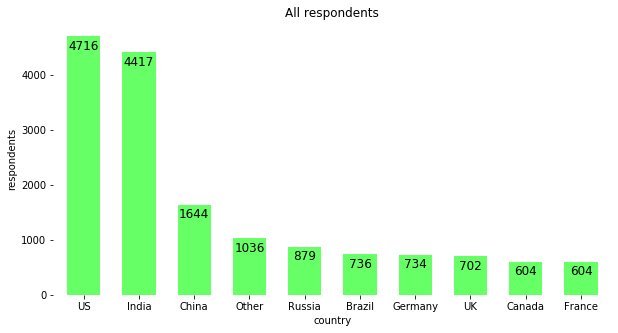

In [13]:
mcr_country_df = mcr_df.country.\
replace({'United States of America':'US','United Kingdom of Great Britain and Northern Ireland':'UK'}).value_counts().head(10)
ax = mcr_country_df.plot(kind='bar', rot=0, color='#66ff66',figsize=(10,5), width=.6, title='All respondents')
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
             ha='center', va='center', fontsize=12, color='black', xytext=(0, -10),
             textcoords='offset points')
plt.xlabel('country')
plt.ylabel('respondents')
plt.box(on=None)

As previously noted, country receiving less than 50 responses was grouped under “Other”. If to focus on switcher and others separately, the following is obtained: 

Text(0, 0.5, 'respondents')

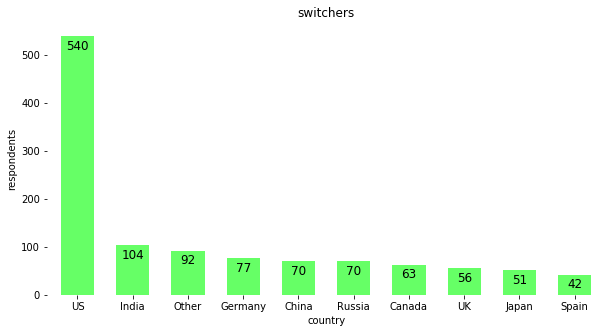

In [14]:
mcr_swithers_country_df = mcr_switchers_df.country.replace({'United States of America':'US','United Kingdom of Great Britain and Northern Ireland':'UK'}).value_counts().head(10)
ax = mcr_swithers_country_df.plot(kind='bar', rot=0, color='#66ff66',figsize=(10,5), width=.6, title='switchers')
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
             ha='center', va='center', fontsize=12, color='black', xytext=(0, -10),
             textcoords='offset points')
plt.box(on=None)
plt.xlabel('country')
plt.ylabel('respondents')

Text(0, 0.5, 'respondents')

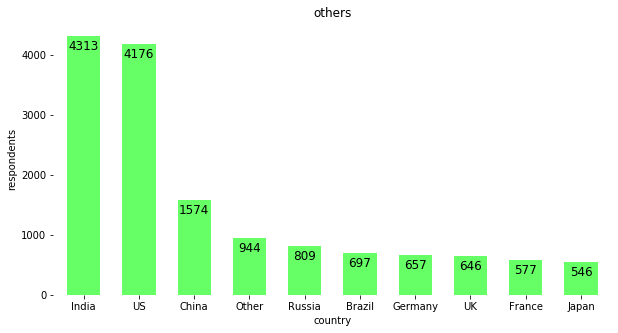

In [15]:
mcr_exc_switchers_country_df = mcr_exc_switchers_df.country.\
replace({'United States of America':'US','United Kingdom of Great Britain and Northern Ireland':'UK'}).value_counts().head(10)
ax = mcr_exc_switchers_country_df.plot(kind='bar', rot=0, color='#66ff66',figsize=(10,5), width=.6, title='others')
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
             ha='center', va='center', fontsize=12, color='black', xytext=(0, -10),
             textcoords='offset points')
plt.box(on=None)
plt.xlabel('country')
plt.ylabel('respondents')

In [16]:
mcr_switchers_df.country.nunique(), mcr_df.country.nunique()

(58, 58)

Leading country for switchers is the US. If to exclude switchers from total India becomes a top country of data professionals without Business discipline background. Perhaps this is mainly due to the fact that there are so many persons majoring in Computer Science and Engineers in India. 
Both switchers and others include equal number of countries, since number of unique countries in both groups is 58.


# Q26 - Data Scientist?

It worth also examine how many of these persons consider themselves Data Scientist. We can find this by looking at the answers of question #26. Kaggle asked the respondents an intriguing question – “Do you consider yourself to be a data scientist?”.   

In [17]:
data = pd.DataFrame({'others':mcr_exc_switchers_df.consider_DS.dropna().value_counts(normalize=True),'switchers':mcr_switchers_df.consider_DS.dropna().value_counts(normalize=True)})
data['consider_DS'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)
data.dropna(inplace=True)

In [18]:
# Function to create divergent bar chart

def plot_diverging_bar_char(title = None, ylim = None, xlim_arg1 = None, xlim_arg2 = None, 
                            xlabel = None, ylabel = None, yticks = None):
    
    Y = np.arange(len(data))
    X1 = data.others
    X2 = data.switchers


    plt.axes([0.05,0.05,0.95,0.95])
    plt.barh(Y, -X1, facecolor='#df80ff', edgecolor='white')
    plt.barh(Y, +X2, facecolor='#66ff66', edgecolor='white')

    for y,x in zip(Y,X2):
        plt.text(x+.01, y, '{:.1%}'.format(x), ha='left', va= 'center')

    for y,x in zip(Y,X1):
        plt.text(-x-.01, y, '{:.1%}'.format(x), ha='right', va= 'center')

    plt.ylim(ylim, len(Y)) 
    plt.yticks([])
    plt.xlim(xlim_arg1, xlim_arg2) 
    plt.xticks([])

    plt.xlabel(xlabel)
    plt.title(title)
    plt.yticks(Y, yticks)
    plt.box(on=None)
    plt.legend(data.columns[:-1])
    plt.show()

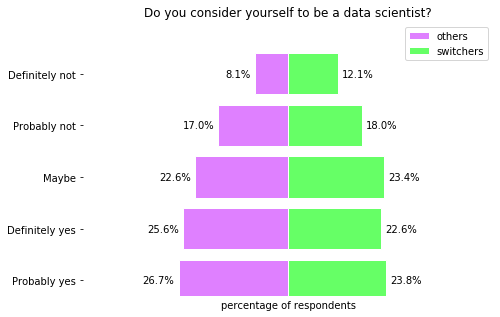

In [19]:
plot_diverging_bar_char(title = 'Do you consider yourself to be a data scientist?',
                            ylim = -.3,
                            xlim_arg1 = -.50,
                            xlim_arg2 = +.50,
                            xlabel = 'percentage of respondents',
                            ylabel = None, 
                            yticks = data.consider_DS)

Figure above reveals the fact that switchers are not as confident as other respondents, since “Maybe” category is in the second place. Note also that while 25.6% of others think they are definitely data scientists, only 22.6% of switchers think so.

# Q1 Gender distribution

Text(0.5, 1.0, 'switchers')

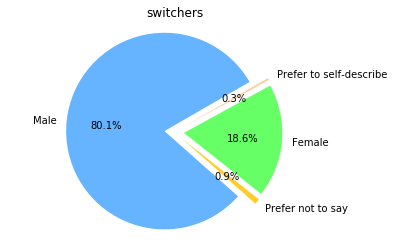

In [20]:
labels = 'Male','Prefer not to say', 'Female', 'Prefer to self-describe'
sizes = [mcr_switchers_df.gender.value_counts()[0],mcr_switchers_df.gender.value_counts()[2],\
        mcr_switchers_df.gender.value_counts()[1],mcr_switchers_df.gender.value_counts()[3]]
explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#66b3ff','#ffcc29' ,'#66ff66','#ffcc99']
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
ax.axis('equal')
plt.title('switchers')

Text(0.5, 1.0, 'others')

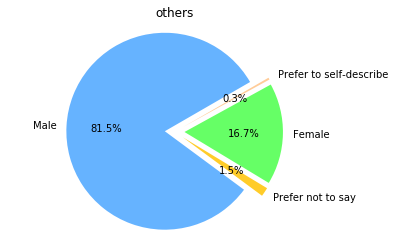

In [21]:
labels = 'Male','Prefer not to say', 'Female', 'Prefer to self-describe'
sizes = [mcr_exc_switchers_df.gender.value_counts()[0],mcr_exc_switchers_df.gender.value_counts()[2],\
        mcr_exc_switchers_df.gender.value_counts()[1],mcr_exc_switchers_df.gender.value_counts()[3]]
explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#66b3ff','#ffcc29' ,'#66ff66','#ffcc99']
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
ax.axis('equal')  
plt.title('others')

As obvious from the charts above the community of data practitioners are dominated by males.

# Q2 Age Distribution

Age distribution of the community discloses even more interesting facts.

In [22]:
age_swt = mcr_switchers_df.age.value_counts(normalize=True).reindex(['18-21','22-24',
                                                   '25-29','30-34',
                                                   '35-39','40-44',
                                                   '45-49','50-54',
                                                   '55-59','60-69',
                                                   '70-79','80+'])

age_oth = mcr_exc_switchers_df.age.value_counts(normalize=True).reindex(['18-21','22-24',
                                                   '25-29','30-34',
                                                   '35-39','40-44',
                                                   '45-49','50-54',
                                                   '55-59','60-69',
                                                   '70-79','80+'])

data = pd.DataFrame({'others':age_oth,'switchers':age_swt})
data['age'] = data.index
data.reset_index(drop=True, inplace=True)
# data.sort_values(by=['others'], ascending=False, inplace=True)
data.dropna(inplace=True)

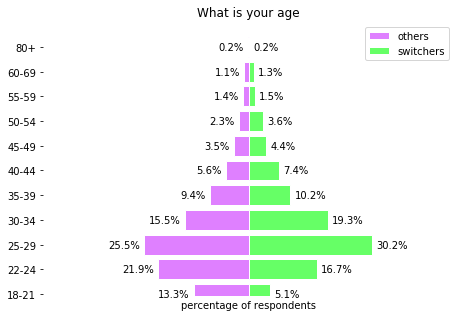

In [23]:
plot_diverging_bar_char(title = 'What is your age',
                            ylim = -.07,
                            xlim_arg1 = -.50,
                            xlim_arg2 = +.50,
                            xlabel = 'percentage of respondents',
                            ylabel = 'age group', 
                            yticks = data.age)

Most of the community is young, though there are persons older than 70 years. Interestingly more than 13% of others (3037) are in the range of 18-21. Switchers and others have equal number of young persons between 22-29, though 25-29 range dominate for switchers.

# Q4 Highest level of education

In [24]:
data = pd.DataFrame({'others':mcr_exc_switchers_df.education.dropna().value_counts(normalize=True),\
                     'switchers':mcr_switchers_df.education.dropna().value_counts(normalize=True)})
data['education'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)
data.dropna(inplace=True)

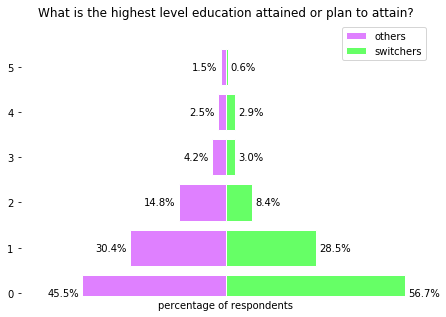

In [25]:
plot_diverging_bar_char(title = 'What is the highest level education attained or plan to attain?',
                            ylim = -.07,
                            xlim_arg1 = -.65,
                            xlim_arg2 = +.65,
                            xlabel = 'percentage of respondents',
                            ylabel = 'degree', 
                            yticks = None)

After investigating highest level of education, a respondent attained or plan to attain, it can be concluded that community of data professionals is highly educated. 

As for switchers, many of them have a secondary degree and more than half have Master’s degree.

# Q5 Undergraduate major

We already know that about 8% of respondents are switchers with an undergraduate major in a business discipline (accounting, finance, economics, etc.). Examining the figure below it is clear that switchers business major is the 4th common background of data scientists:

Text(0.5, 1.0, 'Which best describes your undergraduate major?')

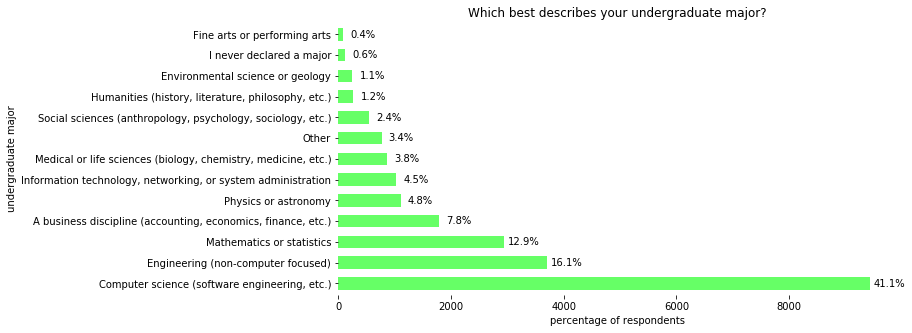

In [26]:
ax=mcr_df.major.value_counts().plot(kind='barh', rot=0, color='#66ff66',\
                                    figsize=(10,5), width=.6, title='All - Undergraduate major')
ax.title.set_fontsize(15)
for p in ax.patches:
    width = p.get_width()
    percent = '{:.1%}'.format(width/mcr_df.major.value_counts().sum())
    plt.text(350+p.get_width(), p.get_y()+0.5*p.get_height(),percent, ha='center', va='center')

plt.box(on=None)
plt.xlabel('percentage of respondents')
plt.ylabel('undergraduate major')
plt.title('Which best describes your undergraduate major?')

It is not a surprise that many of data scientists studied Computer Science, Engineering or Mathematics/Statistics as a major.

# Q7 Industry and Q8 Experience

In response to questions about current industry and years of experience in current role survey-takers answers the following way. Let’s examine switchers and others separately.

In [27]:
q78s = mcr_switchers_df[['industry','experience']].dropna()
q78s['one']=1
q78s_p = pd.pivot_table(q78s, values='one',index='industry',columns='experience',aggfunc='sum', margins=True)
q78s_p = q78s_p[['0-1','1-2','2-3','3-4','4-5','5-10','10-15','15-20','20-25','25-30','30 +','All']].sort_values('All', ascending=False)

Text(0, 0.5, 'current work industry')

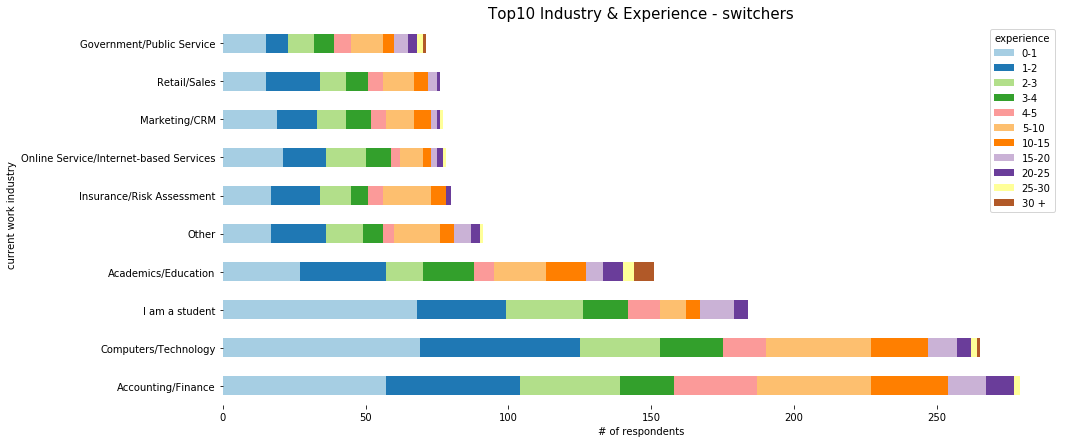

In [28]:
ax = q78s_p.iloc[1:,:-1].head(10).plot.barh(stacked=True, figsize=(15,7), cmap='Paired', title='Top10 Industry & Experience - switchers')
ax.title.set_fontsize(15)
# ax.legend(fontsize=15, title='experience', title_fontsize=15)
plt.box(on=None)
plt.xlabel('# of respondents')
plt.ylabel('current work industry')

In [29]:
q78 = mcr_exc_switchers_df[['industry','experience']].dropna()
q78['one']=1
q78_p = pd.pivot_table(q78,values='one',index='industry',columns='experience',aggfunc='sum', margins=True)
q78_p = q78_p[['0-1','1-2','2-3','3-4','4-5','5-10','10-15','15-20','20-25','25-30','30 +','All']].sort_values('All', ascending=False)


Text(0, 0.5, 'current work industry')

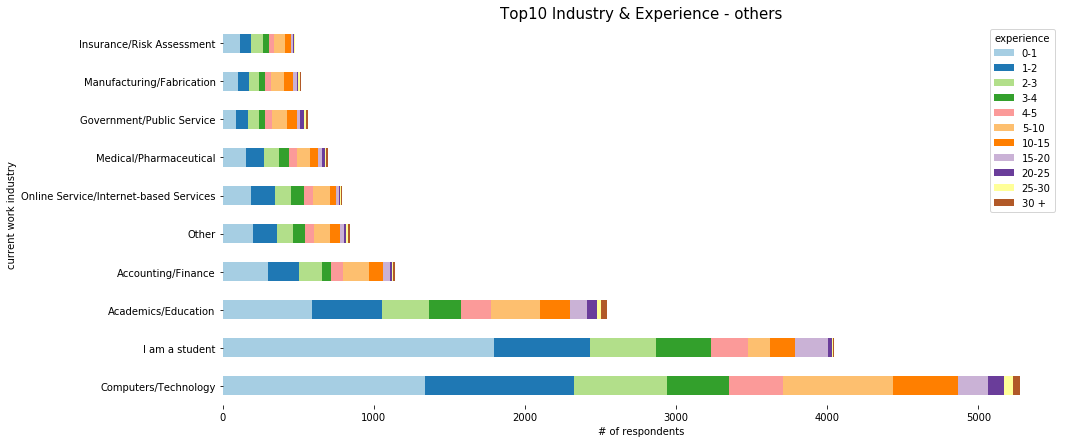

In [30]:
ax = q78_p.iloc[1:,:-1].head(10).plot.barh(stacked=True, figsize=(15,7), cmap='Paired',\
                                           title='Top10 Industry & Experience - others')
ax.title.set_fontsize(15)
# ax.legend(fontsize=15, title='experience', title_fontsize=15)
plt.box(on=None)
plt.xlabel('# of respondents')
plt.ylabel('current work industry')

As expected, switchers (with major in business discipline) work primarily in Accounting/Finance industry. Many respondents just started their career and have 1 to 3 years of experience. Data practitioners mostly prefer to work in Computers/Technology industry.

## Industy - free form responses

In [31]:
def plot_word_cloud(data):
    wc = wordcloud.WordCloud(width=1000, height=500, colormap="Paired", background_color="white")
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

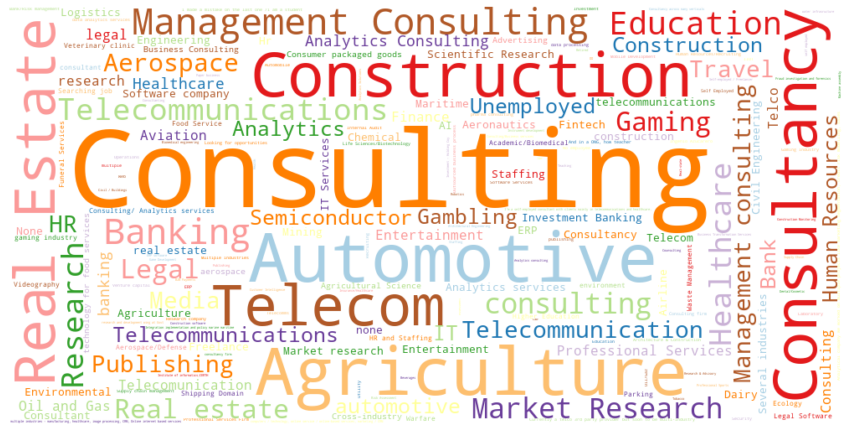

In [32]:
plot_word_cloud(ffr_df.industry.value_counts())

(-0.5, 999.5, 499.5, -0.5)

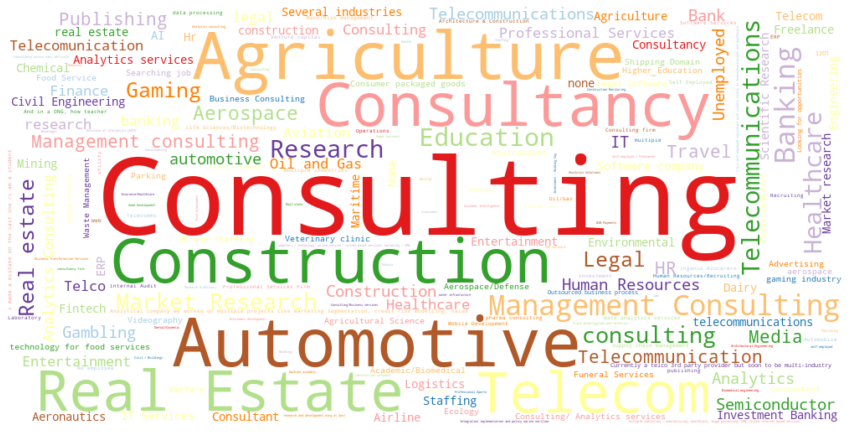

In [33]:
wc = wordcloud.WordCloud(width=1000, height=500, colormap="Paired", background_color="white")
wc.generate_from_frequencies(ffr_df.industry.value_counts())
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

Industry question also contained an option to submit text response when “Other“ category was selected. As seen below respondents work in various fields of economy, including Consulting, Agriculture, Telecom, Construction or Automotive.

# Q6 Title

Respondents were asked to share current role title or most recent title if retired. 

Text(0, 0.5, 'work title')

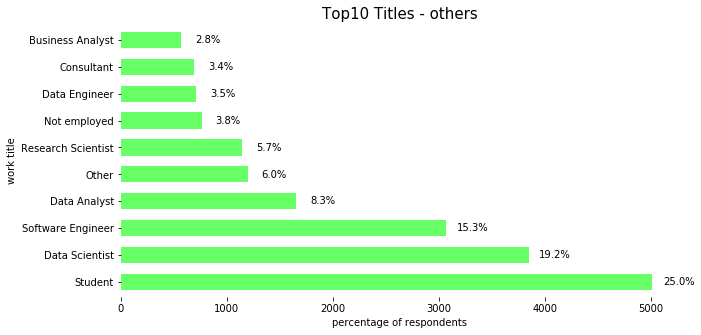

In [34]:
ax=mcr_exc_switchers_df.title.value_counts().head(10).plot(kind='barh', rot=0, color='#66ff66',\
                                    figsize=(10,5), width=.6, title='Top10 Titles - others')
ax.title.set_fontsize(15)
for p in ax.patches:
    width = p.get_width()
    percent = '{:.1%}'.format(width/mcr_exc_switchers_df.industry.value_counts().sum())
    plt.text(250+p.get_width(), p.get_y()+0.5*p.get_height(),percent, ha='center', va='center')

plt.box(on=None)
plt.xlabel('percentage of respondents')
plt.ylabel('work title')

#### Top10 switcher titles

In [35]:
top10_swtitle= mcr_switchers_df.title.value_counts().head(10).to_frame()
top10_swtitle['%'] = top10_swtitle/top10_swtitle.sum()
top10_swtitle = top10_swtitle.rename(columns = {'title':'count'})
top10_swtitle.style.format({'%': '{:.1%}'.format})

,count,%
Data Scientist,291,19.1%
Data Analyst,267,17.5%
Student,240,15.7%
Business Analyst,205,13.4%
Other,127,8.3%
Manager,110,7.2%
Consultant,95,6.2%
Not employed,78,5.1%
Software Engineer,64,4.2%
Chief Officer,48,3.1%


Evidently, every fourth respondent from others is student, while Data Scientist is the second common title. Unpredictably, it is the most prominent title of switchers, followed by Data Analyst, which was the most common expected title. 

# Q9 Compensation

When answering the question about yearly compensation respondents were hesitant to share their salary information, particularly, the switchers. It is obvious from the figures below:

Text(0, 0.5, 'yearly compansation')

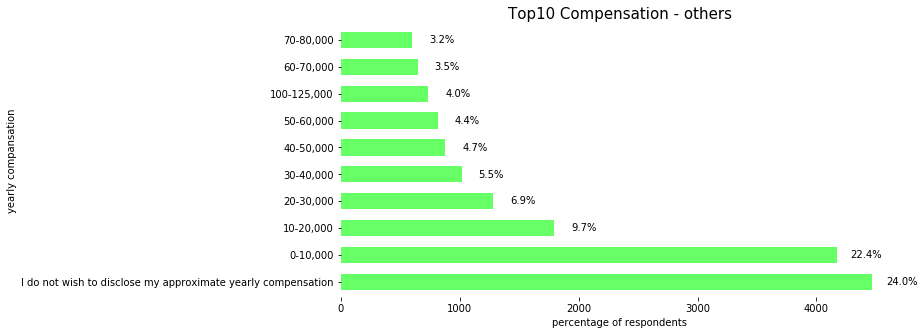

In [36]:
ax=mcr_exc_switchers_df.compensation.value_counts().head(10).plot(kind='barh', rot=0, color='#66ff66',\
                                    figsize=(10,5), width=.6, title='Top10 Compensation - others')
ax.title.set_fontsize(15)
# ax.legend(fontsize=15, title='experience', title_fontsize=15)
for p in ax.patches:
    width = p.get_width()
    percent = '{:.1%}'.format(width/mcr_exc_switchers_df.compensation.value_counts().sum())
    plt.text(250+p.get_width(), p.get_y()+0.5*p.get_height(),percent, ha='center', va='center')

plt.box(on=None)
plt.xlabel('percentage of respondents')
plt.ylabel('yearly compansation')

### Top5 switcher compensation

In [37]:
# mcr_switchers_df.compensation.value_counts().head(10)
top5_swcomp = mcr_switchers_df.compensation.value_counts().head(5).to_frame()
top5_swcomp['%'] = top5_swcomp/top5_swcomp.sum()
top5_swcomp = top5_swcomp.rename(columns = {'compensation':'count'})
top5_swcomp.style.format({'%': '{:.1%}'.format})

,count,%
I do not wish to disclose my approximate yearly compensation,288,32.9%
"0-10,000",228,26.1%
"10-20,000",140,16.0%
"20-30,000",112,12.8%
"100-125,000",107,12.2%


#### Who gets below USD 10000 yearly

In [38]:
below10k = mcr_df[mcr_df.compensation == '0-10,000'].title.value_counts(normalize=True).head().to_frame()
below10k = below10k.rename(columns = {'title':'%'})
below10k.style.format({'%': '{:.1%}'.format})

,%
Student,45.3%
Software Engineer,13.5%
Data Scientist,10.5%
Data Analyst,8.5%
Other,4.8%


Expectedly, of the respondents who get less than USD 10000 yearly almost half is students.

# Q11 What are Data Scientists busy with?

We have seen who data professionals are and where they work. Now let’s see what these people are busy with in everyday work life. We can answer this question by focusing on question #11 – “Select any activities that make up an important part of your role at work”. For this question, a respondent could select multiple answers. In other words, this question allowed to select multiple answers that are (based on the number of multiple choices) spread to several columns in dataset. In order to find what choice each respondent selected, question #11 was filtered from data. Since we deal with untidy data, using Pandas melt function the data was converted to tidy one. These steps were required to make it possible to visualize data.

### Switchers

In [39]:
Q11sw = mcr_switchers_df.filter(like=("Q11"))
Q11sw_unpivot = pd.melt(Q11sw.iloc[:,:-1]).dropna()
Q11sw_unpivot = Q11sw_unpivot['value'].value_counts()
Q11sw_unpivot = Q11sw_unpivot.to_frame().reset_index()
Q11sw_unpivot.columns = ['Activity type - switchers', 'Count']
Q11sw_unpivot['%'] = Q11sw_unpivot['Count']/Q11sw_unpivot['Count'].sum()
Q11sw_unpivot.style.set_properties(subset=['Activity type'], **{'width': '600px'})
Q11sw_unpivot.style.format({'%': '{:.1%}'.format})

,Activity type - switchers,Count,%
0,Analyze and understand data to influence product or business decisions,1074,37.2%
1,Build prototypes to explore applying machine learning to new areas,459,15.9%
2,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",438,15.2%
3,Build and/or run a machine learning service that operationally improves my product or workflows,393,13.6%
4,Do research that advances the state of the art of machine learning,231,8.0%
5,None of these activities are an important part of my role at work,221,7.7%
6,Other,69,2.4%


### Others

In [40]:
Q11 = mcr_exc_switchers_df.filter(like=("Q11"))
Q11_unpivot = pd.melt(Q11.iloc[:,:-1]).dropna()
Q11_unpivot = Q11_unpivot['value'].value_counts()
Q11_unpivot = Q11_unpivot.to_frame().reset_index()
Q11_unpivot.columns = ['Activity type - others', 'Count']
Q11_unpivot['%'] = Q11_unpivot['Count']/Q11_unpivot['Count'].sum()
Q11_unpivot.style.set_properties(subset=['Activity type'], **{'width': '600px'})
Q11_unpivot.style.format({'%': '{:.1%}'.format})

,Activity type - others,Count,%
0,Analyze and understand data to influence product or business decisions,8458,24.7%
1,Build prototypes to explore applying machine learning to new areas,6774,19.8%
2,Build and/or run a machine learning service that operationally improves my product or workflows,5088,14.9%
3,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",4795,14.0%
4,Do research that advances the state of the art of machine learning,4703,13.8%
5,None of these activities are an important part of my role at work,3250,9.5%
6,Other,1123,3.3%


It looks like all are mainly busy with analysis of data and applying machine learning to new areas. Switchers 3rd most favorite activity is to create and maintain databases, while others deal with building machine learning services. Note that switchers are busier with data analysis/understanding, than others.

# Q12 Primary tool used

In [41]:
data = pd.DataFrame({'others':mcr_exc_switchers_df.primary_tool.value_counts(normalize=True),'switchers':mcr_switchers_df.primary_tool.value_counts(normalize=True)})
data['primary_tool'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)

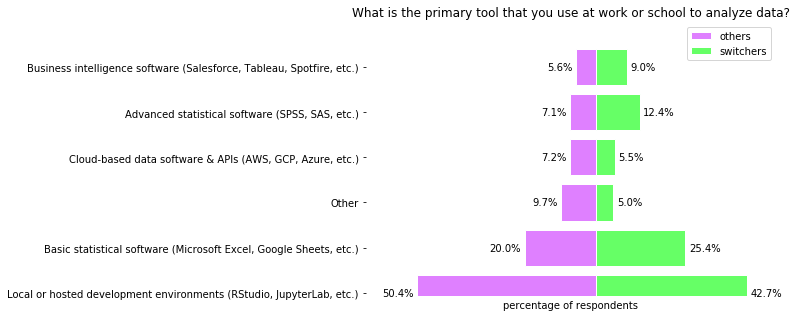

In [42]:
plot_diverging_bar_char(title = 'What is the primary tool that you use at work or school to analyze data?',
                            ylim = -.07,
                            xlim_arg1 = -.65,
                            xlim_arg2 = +.51,
                            xlabel = 'percentage of respondents',
                            ylabel = 'tools used', 
                            yticks = data.primary_tool)

In terms of tools used, as anticipated, All use RStudio and JupyterLab as favorite tools for data analysis. Data professionals still count on on spreadsheets as one of the most reliable tools.  
Typically, switchers use spreadsheets (such as MS Excel or Google Sheets), statistical software (such as SPSS or SAS) and BI tools (Salesforse or Tableau) more than others.

# Q17 Favorite programming language

In [43]:
data = pd.DataFrame({'others':mcr_exc_switchers_df.language_often.dropna().value_counts(normalize=True),\
                     'switchers':mcr_switchers_df.language_often.dropna().value_counts(normalize=True)})
data['language_often'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)
data.dropna(inplace=True)

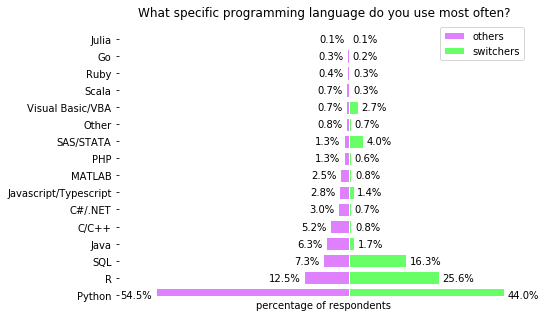

In [44]:
plot_diverging_bar_char(title = 'What specific programming language do you use most often?',
                            ylim = -.07,
                            xlim_arg1 = -.65,
                            xlim_arg2 = +.51,
                            xlabel = 'percentage of respondents',
                            ylabel = 'programming language used', 
                            yticks = data.language_often)

### Most recommended languages

(-0.5, 999.5, 499.5, -0.5)

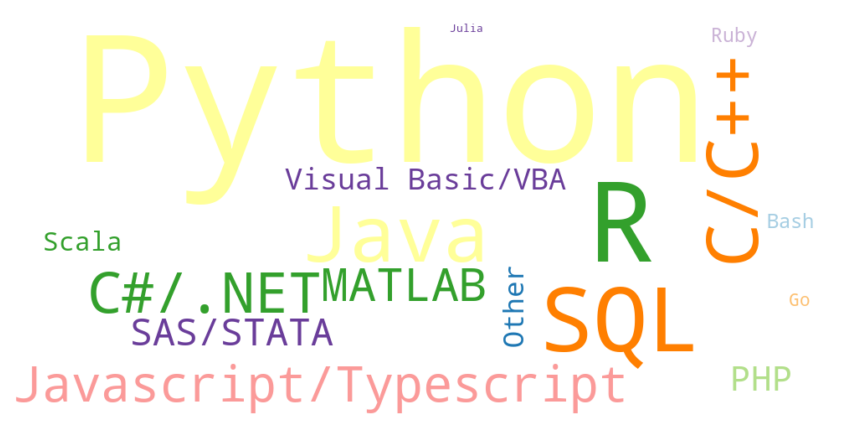

In [45]:
wc = wordcloud.WordCloud(width=1000, height=500, colormap="Paired", background_color="white")
wc.generate_from_frequencies(mcr_df.language_often.value_counts())
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

Respondents most favorite and most recommended programming languages list is dominated by Python. 

## Most favorite language - free form questions

Looking at free form answer we can witness large diversity of languages used by survey-daters. 

(-0.5, 999.5, 499.5, -0.5)

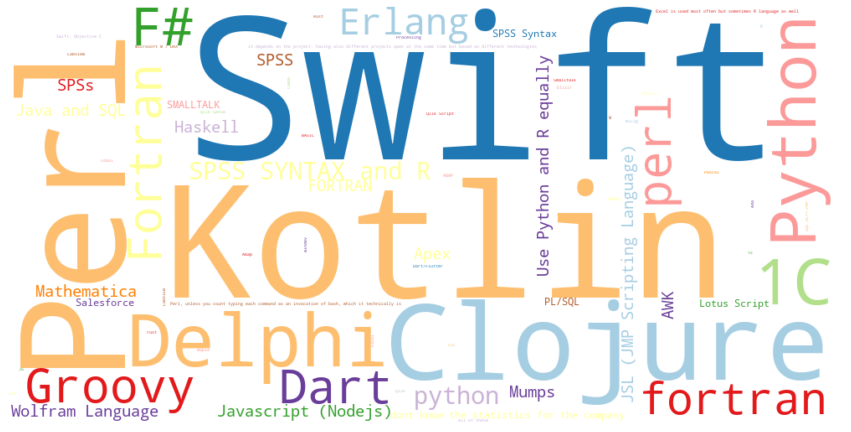

In [46]:
wc = wordcloud.WordCloud(width=1000, height=500, colormap="Paired", background_color="white")
wc.generate_from_frequencies(ffr_df.language_often.value_counts())
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

## Most recommended language - free form questions

(-0.5, 999.5, 499.5, -0.5)

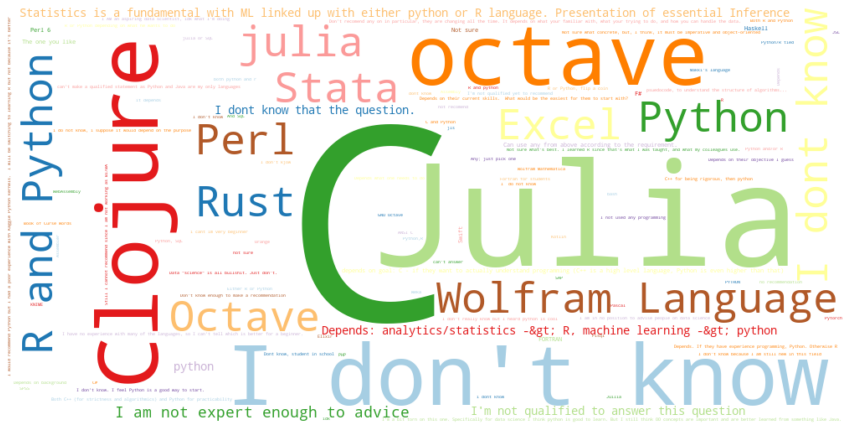

In [47]:
wc = wordcloud.WordCloud(width=1000, height=500, colormap="Paired", background_color="white")
wc.generate_from_frequencies(ffr_df.language_recommend.value_counts())
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

Interestingly, respondents’ most used languages are not their most recommended ones for beginners. Perhaps they are not happy with what language they use.

# Q13 IDE and Q14 Hosted Notebooks

When speaking of programming languages, it worth also examine what IDEs are used frequently. Note that, as in the case of question #11, the questions about IDEs and hosted notebooks also allowed survey-takers to select multiple answers. Therefore, data were unpivoted to make them tidy.

In [48]:
Q13 = mcr_exc_switchers_df.filter(like=("Q13"))
Q13_unpivot = pd.melt(Q13.iloc[:,:-2]).dropna()
Q13sw = mcr_switchers_df.filter(like=("Q13"))
Q13sw_unpivot = pd.melt(Q13sw.iloc[:,:-2]).dropna()

In [49]:
data = pd.DataFrame({'others':Q13_unpivot['value'].value_counts(normalize=True),'switchers':Q13sw_unpivot['value'].\
                     value_counts(normalize=True)})
data['IDEtype'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)

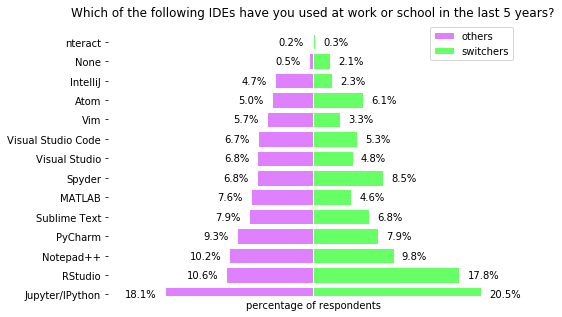

In [50]:
plot_diverging_bar_char(title = 'Which of the following IDEs have you used at work or school in the last 5 years?',
                            ylim = -.07,
                            xlim_arg1 = -.25,
                            xlim_arg2 = +.25,
                            xlabel = 'percentage of respondents',
                            ylabel = 'IDEs used', 
                            yticks = data.IDEtype)

As we can see Jupyter/iPython Notebook is the most popular IDE used by the community. RStudio is second most widely used IDE, in particular, by switchers.

# IDE - free form questions

In addition to the IDEs above, people also frequently use Eclipse, Emacs, Netbeas, Octave, as seen from the following figure created based on free form responses.

(-0.5, 999.5, 499.5, -0.5)

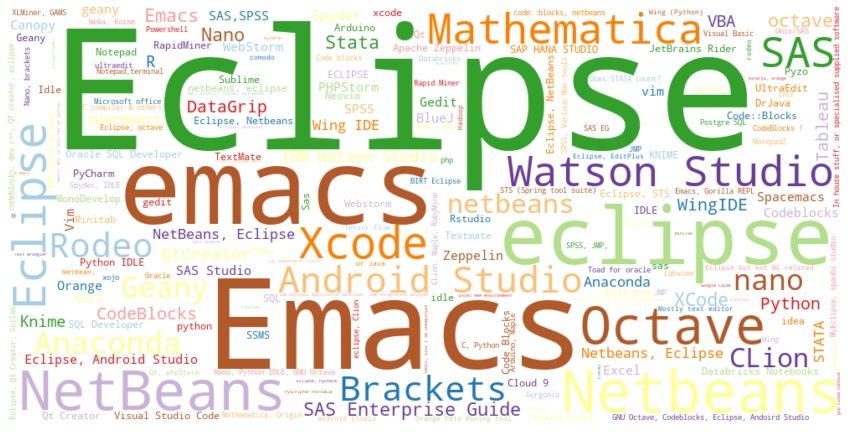

In [51]:
wc = wordcloud.WordCloud(width=1000, height=500, colormap="Paired", background_color="white")
wc.generate_from_frequencies(ffr_df.ide.value_counts())
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [52]:
Q14 = mcr_exc_switchers_df.filter(like=("Q14"))
Q14_unpivot = pd.melt(Q14.iloc[:,:-1]).dropna()
Q14sw = mcr_switchers_df.filter(like=("Q14"))
Q14sw_unpivot = pd.melt(Q14sw.iloc[:,:-1]).dropna()

In [53]:
data = pd.DataFrame({'others':Q14_unpivot['value'].value_counts(normalize=True),'switchers':Q14sw_unpivot['value'].\
                     value_counts(normalize=True)})
data['notebook'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)

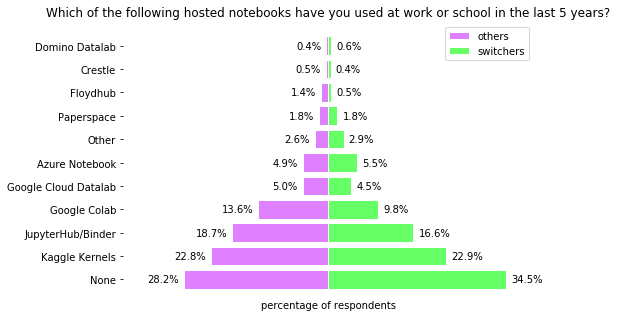

In [54]:
plot_diverging_bar_char(title = 'Which of the following hosted notebooks have you used at work or school in the last 5 years?',
                            ylim = -.7,
                            xlim_arg1 = -.4,
                            xlim_arg2 = +.4,
                            xlabel = 'percentage of respondents',
                            ylabel = 'Hosted Notebooks used', 
                            yticks = data.notebook)

Over 30% of respondents have no experience with hosted notebooks. Perhaps they prefer to work locally. Not surprisingly, Kaggle Kernels are the most popular notebook used, since most of the respondents are Kaggle community members. 

# Q23 Time spent coding

Concerning how busy are data experts with coding, our prediction is that switchers spend less time writing codes than others, they don’t come from technical background as computer science or engineering.   

In [55]:
data = pd.DataFrame({'others':mcr_exc_switchers_df.time_coding.value_counts(normalize=True),\
                     'switchers':mcr_switchers_df.time_coding.value_counts(normalize=True)})
data['time_coding'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)
data.dropna(inplace=True)

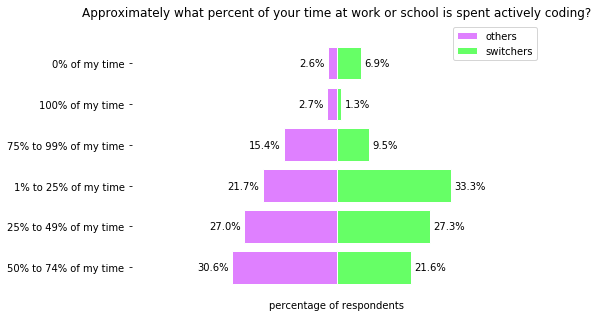

In [56]:
plot_diverging_bar_char(title = 'Approximately what percent of your time at work or school is spent actively coding?',
                            ylim = -.7,
                            xlim_arg1 = -.6,
                            xlim_arg2 = +.6,
                            xlabel = 'percentage of respondents',
                            ylabel = None, 
                            yticks = data.time_coding)

Expectedly switchers spend less time coding than others. Every third switcher spend maximum of 25% of their time coding.

# Q20 Most used ML framework

One of the purposes of the survey was also to have an idea about the status of Machine Learning. In this context, one of the questions asked (#20) was about popularity of machine learning libraries. 

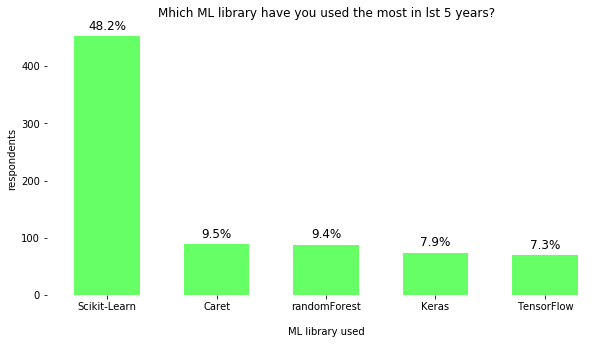

In [57]:
ax=mcr_switchers_df.MLlibrary_most.value_counts().head(5).\
plot(kind='bar', rot=0, color='#66ff66',figsize=(10,5), width=.6, title='Top5 ML - switchers')

for p in ax.patches:
             percent = '{:.1%}'.format(p.get_height()/mcr_switchers_df.MLlibrary_most.value_counts().sum())
             ax.annotate(percent, (p.get_x() + p.get_width()/2., p.get_height()),
             ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
             textcoords='offset points')
plt.ylabel('respondents')
plt.xlabel('ML library used', labelpad=15)
plt.title("Mhich ML library have you used the most in lst 5 years?")

plt.box(on=None)

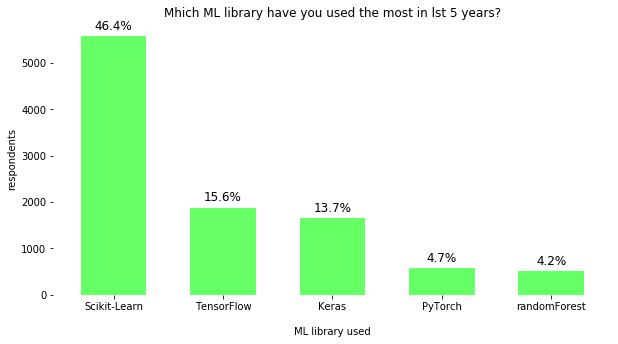

In [58]:
ax=mcr_exc_switchers_df.MLlibrary_most.value_counts().head(5).plot(kind='bar', rot=0, color='#66ff66',figsize=(10,5), width=.6, title='Top5 ML - others')

for p in ax.patches:
             percent = '{:.1%}'.format(p.get_height()/mcr_exc_switchers_df.MLlibrary_most.value_counts().sum())
             ax.annotate(percent, (p.get_x() + p.get_width()/2., p.get_height()),
             ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
             textcoords='offset points')
plt.ylabel('respondents')
plt.xlabel('ML library used', labelpad=15)
plt.title("Mhich ML library have you used the most in lst 5 years?")
plt.box(on=None)

Most used ML framework is famous Scikit-Learn. It is used by almost half of respondents. TensorFlow and Keras fall behind. After Scikit-Learn, switchers favorite ML frameworks are Caret and randomForest.

# Q48 ML models as "black boxes"

Survey also included an unusual question about reliability of machine learning models – “Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?”. 

In [59]:
data = pd.DataFrame({'others':mcr_exc_switchers_df.ML_blackbox.dropna().value_counts(normalize=True),'switchers':mcr_switchers_df.ML_blackbox.dropna().value_counts(normalize=True)})
data['ML_blackbox'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)
data.dropna(inplace=True)

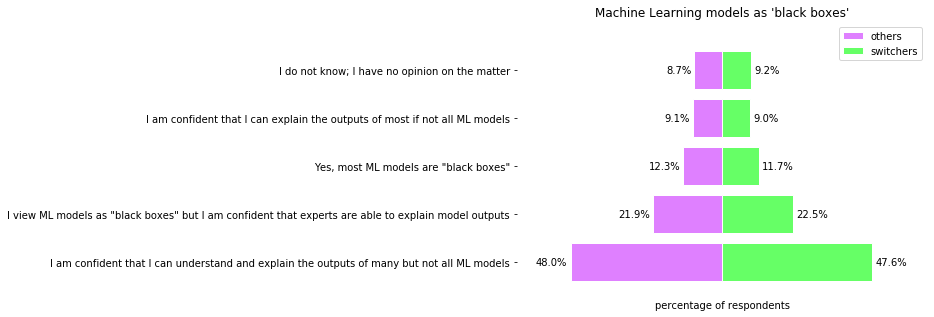

In [60]:
plot_diverging_bar_char(title = "Machine Learning models as 'black boxes'",
                            ylim = -.7,
                            xlim_arg1 = -.65,
                            xlim_arg2 = +.65,
                            xlabel = 'percentage of respondents',
                            ylabel = None, 
                            yticks = data.ML_blackbox)

An interesting insight that can be drawn from the chart above is that, although half of respondents are positive about ML models, based on 2nd and 3rd answers it could be concluded that one third of the respondents are suspicious about ML models.

# Q22 Visualization library

Important area of interest is data visualization libraries used in arsenal of data analysts, especially for switchers, who, as we concluded above, deal with data analysis and understanding more frequently.    

In [61]:
data = pd.DataFrame({'others':mcr_exc_switchers_df.dataviz_most.dropna().value_counts(normalize=True),'switchers':mcr_switchers_df.dataviz_most.dropna().value_counts(normalize=True)})
data['dataviz_most'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)
data.dropna(inplace=True)

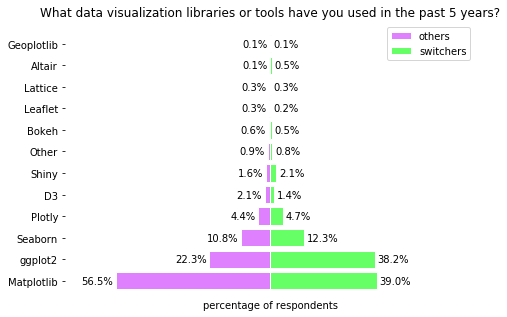

In [62]:
plot_diverging_bar_char(title = 'What data visualization libraries or tools have you used in the past 5 years?',
                            ylim = -.7,
                            xlim_arg1 = -.75,
                            xlim_arg2 = +.75,
                            xlabel = 'percentage of respondents',
                            ylabel = 'Data Viz labrary', 
                            yticks = data.dataviz_most)

Most noticeable fact is that switchers use both Matplotlib and ggplot2 equally as favorite data visualization libraries. More than half of others use Matplotlib. Seaborn is the third most popular data viz library.

## Visualization library - free form answers

Moreover, based in free form answers we see that analysts do not suffice with the libraries above and use various tools, like Tableau, Power BI, Matlab or Mathematica to visualize data.

(-0.5, 999.5, 499.5, -0.5)

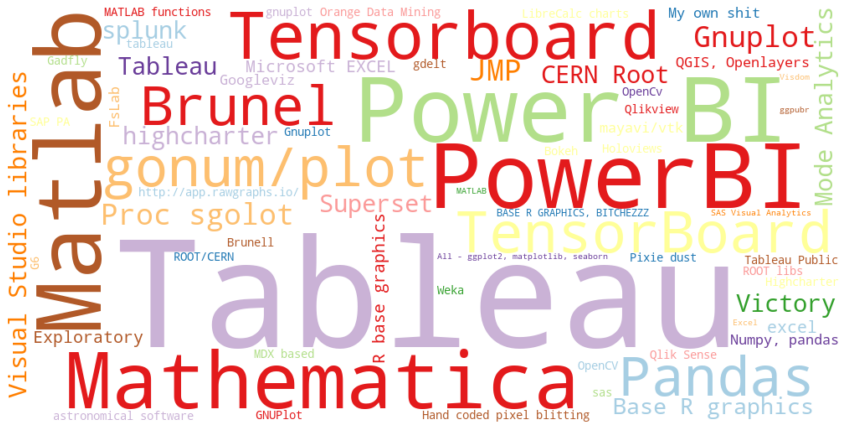

In [63]:
wc = wordcloud.WordCloud(width=1000, height=500, colormap="Paired", background_color="white")
wc.generate_from_frequencies(ffr_df.dataviz_most.value_counts())
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# Q32 Data Type

It worth to explore what types of data respondents mostly interact with. Chart on the left below shows breakdown of data types used by work titles and on the right, there is a comparison of switchers versus others. 

In [64]:
data = pd.DataFrame({'others':mcr_exc_switchers_df.datatype_most.dropna().value_counts(normalize=True),'switchers':mcr_switchers_df.datatype_most.dropna().value_counts(normalize=True)})
data['datatype_most'] = data.index
data.reset_index(drop=True, inplace=True)
data.sort_values(by=['others'], ascending=False, inplace=True)
data.dropna(inplace=True)

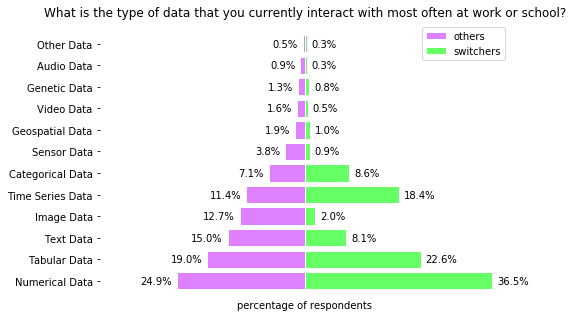

In [65]:
plot_diverging_bar_char(title = 'What is the type of data that you currently interact with most often at work or school?',
                            ylim = -.7,
                            xlim_arg1 = -.4,
                            xlim_arg2 = +.4,
                            xlabel = 'percentage of respondents',
                            ylabel = 'data type', 
                            yticks = data.datatype_most)

Switchers commonly used data types are Numerical, Tabular and Time Series Data. And they use more of these data types than others.

### Data type by Title

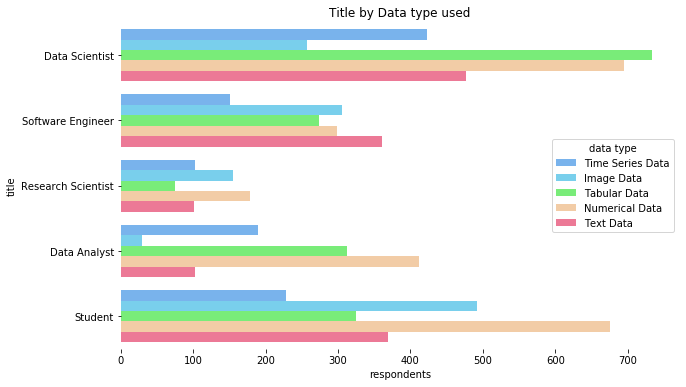

In [66]:
data = mcr_df[['title','datatype_most']].dropna()
data = data[data.title.isin(['Student', 'Data Scientist', 'Software Engineer', 'Data Analyst', 'Research Scientist'])]
data = data[data.datatype_most.isin(['Numerical Data', 'Tabular Data', 'Text Data', 'Time Series Data', 'Image Data'])]
data = data.rename(columns = {'datatype_most':'data type'})
colors = ['#66b3ff','#66d9ff','#66ff66','#ffcc99', '#ff668c']

plt.figure(figsize=(10,6))
g = sns.countplot(y=data.title, hue=data['data type'], palette=colors)
g.set(xlabel='respondents')
plt.title('Title by Data type used')
plt.ylabel('title')
plt.box(on=None)

Data Scientists mainly use Tabular and Numerical data, while Software Engineers work mainly with Text Data. Data Analysts and Students main data type is Numerical.

# Q37 Online Learning Platform

Data Science/Analytics are areas that require continuous learning and knowledge improvement. In addition to academic environments data practitioners also refer to online learning sources.

Text(0.5, 1.0, 'Others')

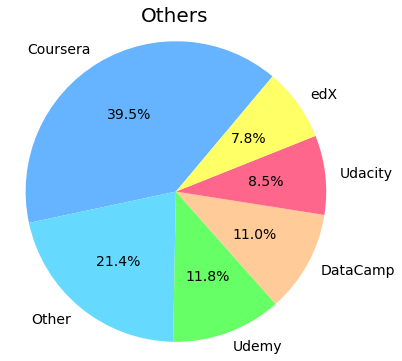

In [67]:
q37_others = mcr_exc_switchers_df.learning_platform_most.dropna().value_counts()
index_others = ['Coursera', 'Udemy', 'DataCamp', 'Udacity', 'edX','Other','Other','Other','Other','Other', 'Other', 'Other']
q37_others.index = index_others

colors = ['#66b3ff','#66d9ff','#66ff66','#ffcc99', '#ff668c', '#ffff66']
labels= ['Coursera', 'Other', 'Udemy', 'DataCamp','Udacity',  'edX']
fig, ax = plt.subplots()
ax.pie(q37_others.groupby(level=0).sum().sort_values(ascending=False),colors=colors, autopct='%1.1f%%', startangle=50,\
       labels=labels, textprops={'fontsize': 14})
ax.axis('equal')
fig.set_size_inches(6, 6)
plt.title('Others', fontsize = 20)

Text(0.5, 1.0, 'Switchers')

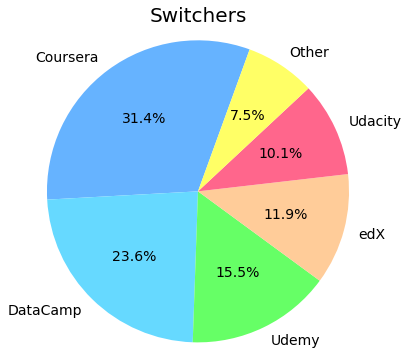

In [68]:
q37_switchers = mcr_switchers_df.learning_platform_most.dropna().value_counts()
index_switchers = ['Coursera', 'DataCamp', 'Udemy', 'edX', 'Udacity', 'Other','Other','Other','Other','Other', 'Other', 'Other']
q37_switchers.index = index_switchers

colors = ['#66b3ff','#66d9ff','#66ff66','#ffcc99', '#ff668c', '#ffff66']
labels= ['Coursera', 'DataCamp','Udemy', 'edX', 'Udacity', 'Other']
fig, ax = plt.subplots()
ax.pie(q37_switchers.groupby(level=0).sum().sort_values(ascending=False),colors=colors, autopct='%1.1f%%', startangle=70,\
       labels=labels, textprops={'fontsize': 14})
ax.axis('equal')
fig.set_size_inches(6, 6)
plt.title('Switchers', fontsize = 20)

Apparently, Coursera is the most popular learning source. For switchers second most popular online learning source is DataCamp.

## Online Learning sources - free form answers

(-0.5, 999.5, 499.5, -0.5)

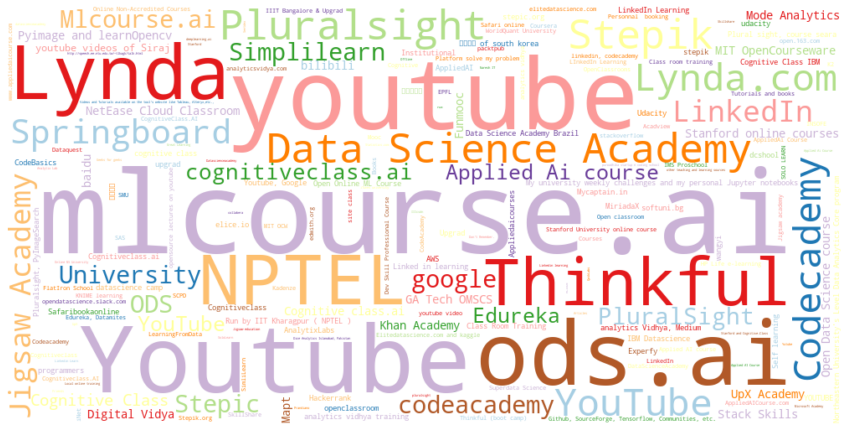

In [69]:
wc = wordcloud.WordCloud(width=1000, height=500, colormap="Paired", background_color="white")
wc.generate_from_frequencies(ffr_df.learning_platform_most.value_counts())
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# Conclusion and Future Work

The visualizations demonstrated above have been very insightful and helped demonstrate current status of Data Science and Machine Learning as well as, reveal some vital differences between switchers and others. As a result of our study key findings can be summarized as following:
-	Most respondents are from US, India and China. US have the highest number of people switching from business discipline to data science/data analytics.
-	Switchers are less confident to call themselves “data scientists” than others.
-	Community is dominated by males, who are mostly younger than 30 years.
-	Both switchers and others are highly educated – more than half have secondary degree.
-	Many of respondents, including switchers, who primarily work in Accounting/Finance industry, have up to 3 year of experience.
-	Many are hesitant to share their compensation. About one fourth of respondents earn below USD 10000 yearly, half of which are students.
-	Switchers are generally busy with data analysis, using JupyterLab, RStudio and Spreadsheets as primary tools.
-	Python is dominating programming language. Switchers also use R and SQL more frequently than others.
-	About one third of respondents don’t use any hosted notebooks, preferring to work locally.
-	Compared to others switchers spend less time coding.
-	Half of respondents can explain Machine Learning model, though one third consider the models as black-boxes.
-	Matplotlib and ggplot2 are wide-spread Data Visualization libraries. Switchers prefer both libraries equally.
-	Switchers commonly use Numerical, Tabular and Time Series Data. Data Scientists are generally busy with Tabular Data, Software Engineers Text. Data, Data Analysts and Students with Numerical Data.
-	All respondents rely mainly on Coursera as a most popular online learning platform.

This paper has not covered all questions asked in the survey. Respondents were also asked about such areas as:
-	Fairness and bias in ML algorithms, 
-	ML model interpretation, 
-	Cloud computing
-	Databases
-	Big-data products
-	Public datasets
-	Work reuse/reproduction

Future analysis can incorporate above-mentioned question responses to establish a more comprehensive view of the status of Data Science field and have even better observation on differences between respondents coming from business discipline against others.

Analysis could further be enriched by using 2017 survey data (or additional external datasets) to find out and explain trends in specific areas. 

Moreover, we can expand the switchers category by including not only respondents with business undergraduate major, but also professionals with other backgrounds, who can be also be considered as switchers. Traditionally people engaged in Data Science have backgrounds in Computer Science, Engineering or Mathematics/Statistics. Taking this into account, we could categorize all respondents with a background other than Computer Science and Engineering, as switchers.

Finally, since survey dataset includes various questions (features), simple machine learning models can be built to find hidden patterns (for example, who truly data scientist are, what are motivation of switchers or what determines data scientist salaries).